MAE: 0.3271442615110037
RMSE: 0.5707464555857348
R2 Score: 0.7101709100087666


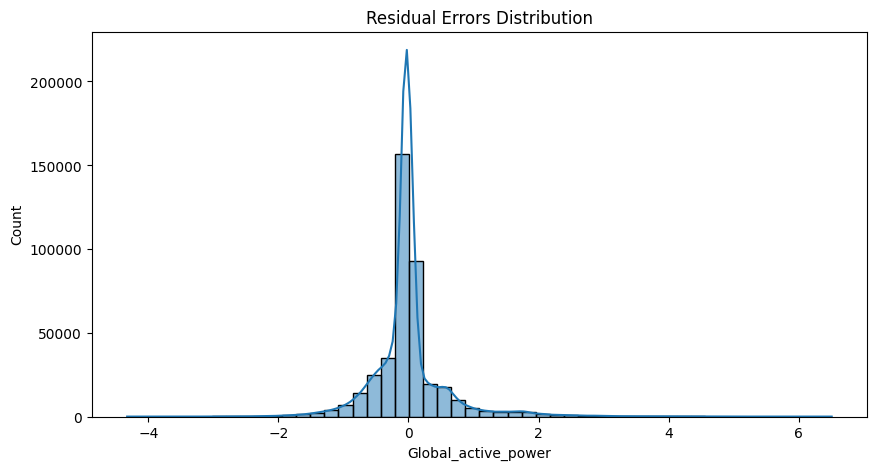

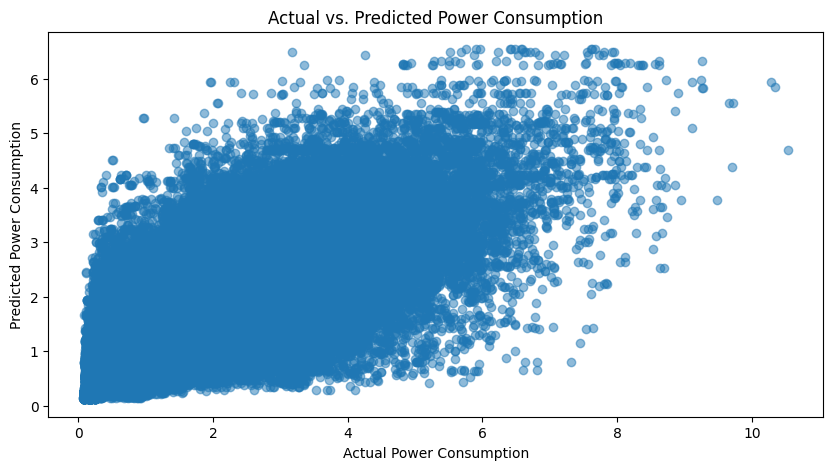

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
url = "household_power_consumption.csv"
data = pd.read_csv(url, sep=';', low_memory=False, na_values=['?'])

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data.dropna(inplace=True)

data['Global_active_power'] = data['Global_active_power'].astype(float)
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Feature Selection
features = ['Hour', 'Day', 'Month', 'Year']
target = 'Global_active_power'

X = data[features]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred, bins=50, kde=True)
plt.title("Residual Errors Distribution")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs. Predicted Power Consumption")
plt.show()